# Convolutional Network Example

In [1]:
# A bunch of imports, not very interesting
from __future__ import division, print_function, absolute_import

# utility packages
import random, os
import datetime as dt
import itertools as it

# TensorFlow is here
import tensorflow as tf
import tflearn

# For numerical computation
import numpy as np
import pandas as pd

# For plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
% matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,10)

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


Here I'll be loading a saved Convolutional Network - this is the best model I've been able to run so far. First we have to load the data, and the network model.

## Importing the Data

In [2]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


## Assigning the Training and Test Data

In [3]:
train_images = mnist.train.images.reshape([-1, 28, 28, 1])
train_labels = mnist.train.labels.astype(np.float32)

test_images = mnist.test.images.reshape([-1, 28, 28, 1])
test_labels = mnist.test.labels.astype(np.float32)

print("There are %d images in the training set" %len(mnist.train.images))
print("There are %d images in the test set"     %len(mnist.test.images))

There are 55000 images in the training set
There are 10000 images in the test set


## Building the Network

In [4]:
from mnist_nets import mnist_convnet

In [5]:
net = mnist_convnet(train_images, 
                    train_labels, 
                    learning_rate=0.001, 
                    drop_prob=0.8)
model = tflearn.DNN(net, 
                    tensorboard_verbose=3, 
                    tensorboard_dir='tflearn_logs')

In [6]:
model.load('Models\\mnist_convnet_LR=0.001')

INFO:tensorflow:Restoring parameters from C:\Users\cmoses\Documents\Work\Presentations\Tensorflow - A neural network API in Python\tensorflow\TFLearn\Models\mnist_convnet_LR=0.001


In [8]:
prediction = model.predict(test_images)
prediction = np.array(prediction)

target_matrix = np.dot(test_labels.T, test_labels)
confusion_matrix = np.dot(test_labels.T, prediction)
accuracy_matrix = np.abs(target_matrix - confusion_matrix)

In [9]:
def plot_matrix(matrix, ticks=True):
    plt.matshow(matrix)
    plt.legend()
    plt.colorbar()
    plt.set_cmap('jet')
    plt.ylabel("Predicted Value")
    plt.grid('off')
    
    if ticks:
        plt.axis('on')
        plt.title("True Value")
        plt.xticks(range(10))
        plt.yticks(range(10))
    else:
        plt.axis('off')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


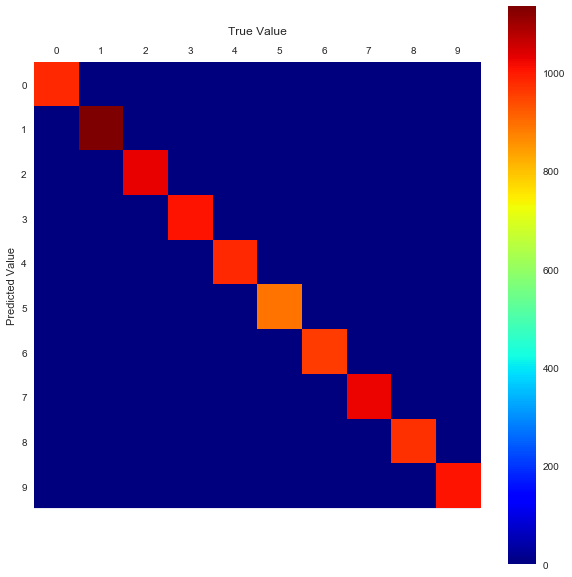

In [10]:
plot_matrix(target_matrix)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


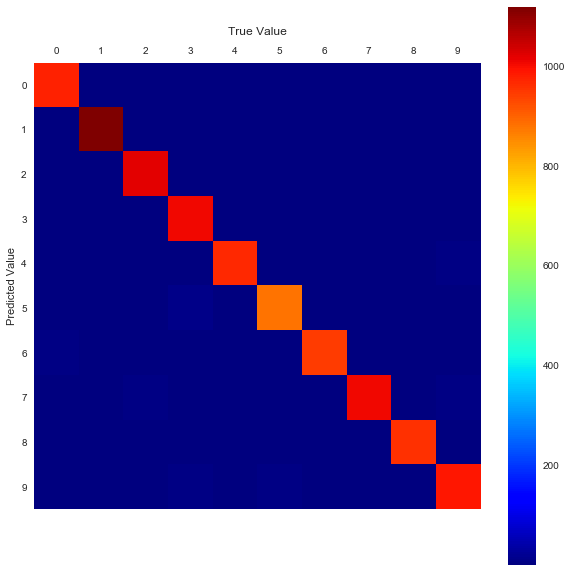

In [11]:
plot_matrix(confusion_matrix)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


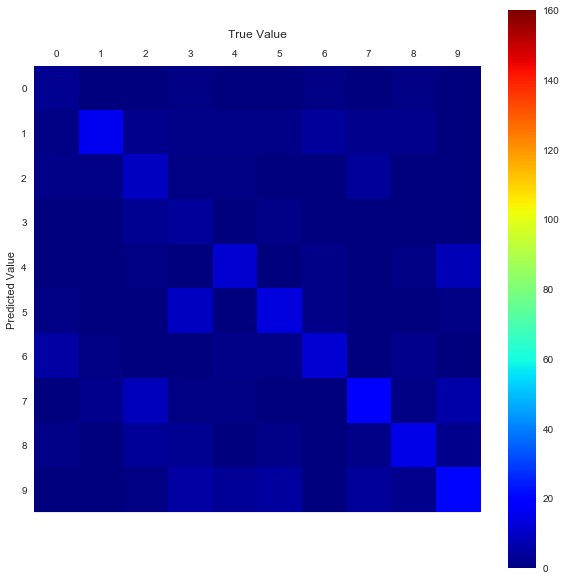

In [22]:
plot_matrix(accuracy_matrix)
plt.clim(0, 160)

In [13]:
preds = np.argmax(prediction, axis=1)
targs = np.argmax(test_labels, axis=1)
hits = preds == targs

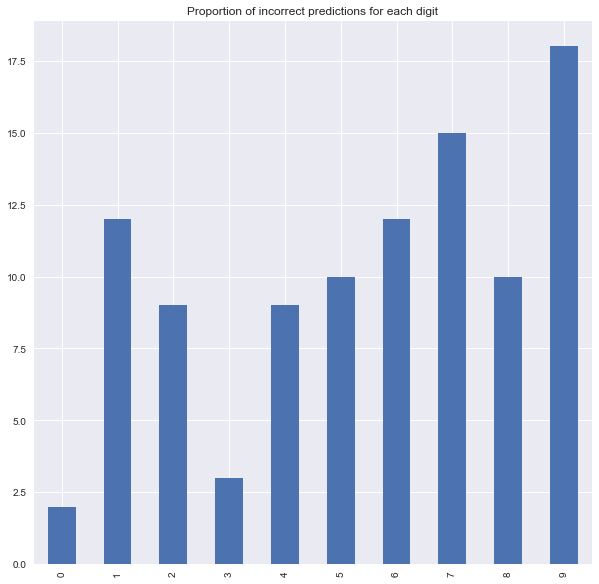

In [14]:
miss_freqs = pd.Series(targs[hits == False])\
               .value_counts()\
               .sort_index()
miss_freqs.plot(kind = 'bar',
                title = 'Proportion of incorrect predictions for each digit')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


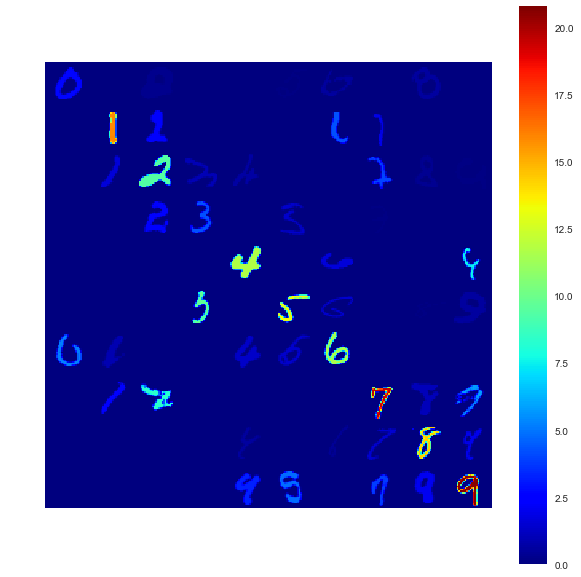

In [17]:
def mask_by_classification(pred, targ):
    '''Returns a digit that the model misclassified as pred
       when the true value was targ'''
    mask = np.logical_and(preds == pred, targs == targ)
    return mask

def entropy(x):
    return -x * np.log(x)

entropies = np.sum(entropy(prediction), axis=1)

res = []
for i, j in it.product(range(10), range(10)):
    mask = mask_by_classification(i, j)
    pred = prediction[mask]
    test = test_images[mask]
    
    if not np.any(mask):
        res.append(np.zeros(shape=(28,28)))
    else:
        index = np.argmin(entropies[mask])
        res.append(test[index].reshape(28,28) * accuracy_matrix[i, j])

rows = []
for r in range(0, 100, 10):
    row = res[r:r+10]
    rows.append(np.concatenate(row, axis=1))
image = np.concatenate(rows, axis=0)

plot_matrix(image, ticks=False)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


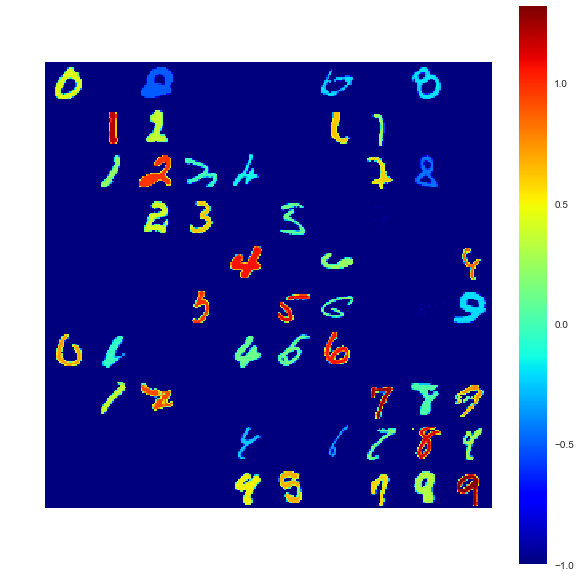

In [16]:
log_image = image
log_image[log_image < 0.1] = 0.1
log_image = np.log10(log_image)
plot_matrix(log_image, ticks=False)